In [4]:
#import tensorflow
import warnings

warnings.filterwarnings ('ignore')
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import tensorflow as tf 
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
def calculate_adj_r2(r_sq, k, n):

    adj_r = 1-((1-r_sq)*(n-1)/(n-k-1))
   
    return adj_r

Using TensorFlow backend.


In [5]:
def LabelEncode(df_local):
    for col in df_local.columns:
        col_dict = {}
        if df_local[col].dtype!='object':
            continue
        elif df_local[col].dtype=='object':
            col2=df_local[col].unique()
            z=0
            for i in col2:
                col_dict[i]=z
                z+=1
            df_local[col]=df_local[col].map(col_dict)
        
            
    return df_local

data=pd.read_csv("auto-mpg.csv")
data.head()

print(data.columns)
data.fillna(0)
print(data.columns)
df_encode = LabelEncode(data)
df_encode.shape

X = ['cylinders', 'displacement', 'horsepower', 'weight',
        'model year', 'origin', 'car name' ]
#X=['weight', 'model year', 'origin']

Y = ['mpg']
# X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
# df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
# df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
# print(df_train.size)
# print(df_test.size)
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [6]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)

activation_list = ['linear','relu', 'sigmoid', 'tanh', 'elu','softmax','softplus','softsign','selu','exponential']


In [7]:

def r2_coeff(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1)), axis=-1)
    return (1 - SS_res/(SS_tot + tf.keras.backend.epsilon()))
    

def adj_r2(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred), axis=-1)
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true, axis=-1)), axis=-1)
    return (1 - (1 - r2_coeff(y_true, y_pred)) * (tf.cast(tf.size(y_true), tf.float32) - 1) / (tf.cast(tf.size(y_true), tf.float32) - tf.cast(tf.rank(y_true), tf.float32) - 1))

def adjusted_r2_score(r2, n, k):
    return 1-((1-r2)*(n-1)/(n-k-1))

In [8]:
def model_function(i, len_x):
    model = Sequential()
    model.add(Dense(len_x+1, input_dim=len_x, activation=i, kernel_initializer='normal'))
    model.add(Dense(len_x+1))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(optimizer='adam', loss='mae',  metrics = ['mse',r2_coeff, adj_r2]) 
    return model
    


dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


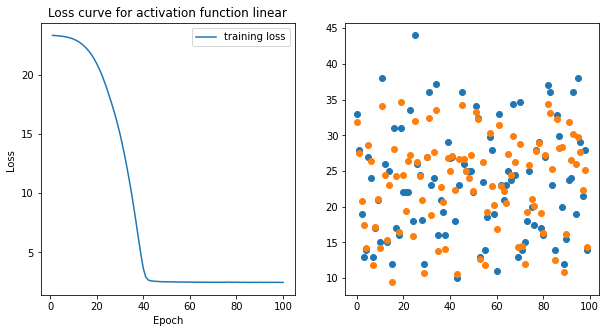

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


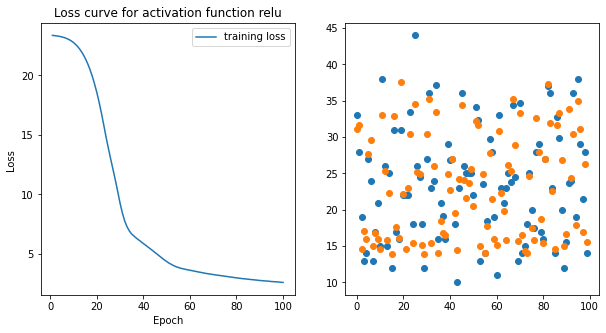

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


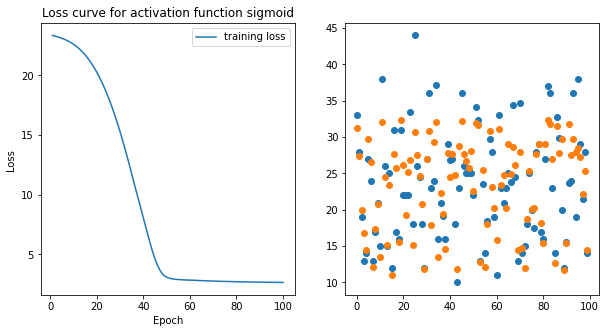

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


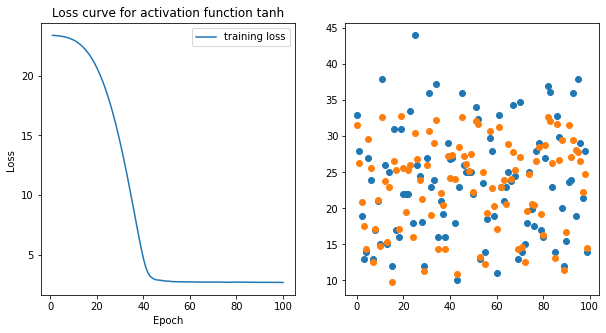

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


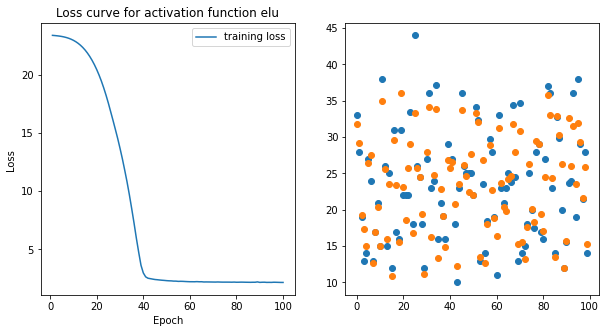

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


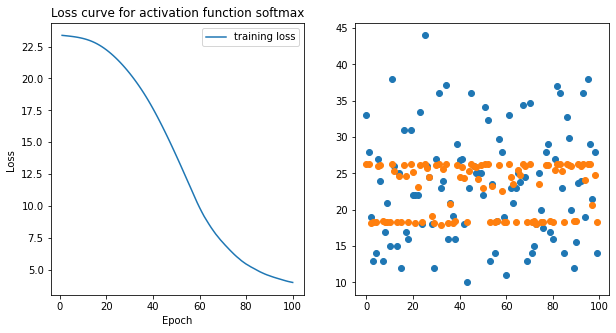

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


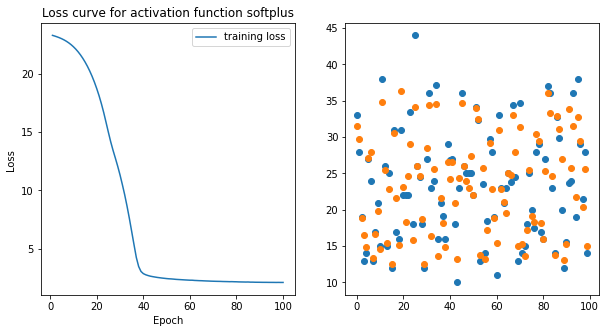

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


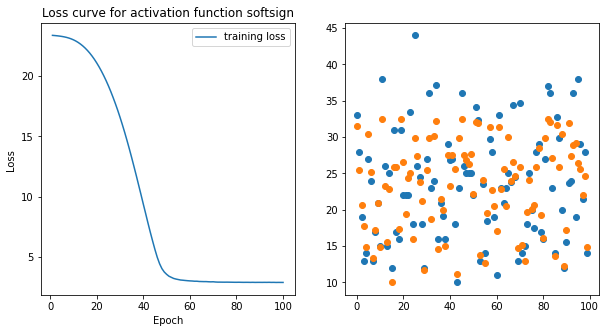

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


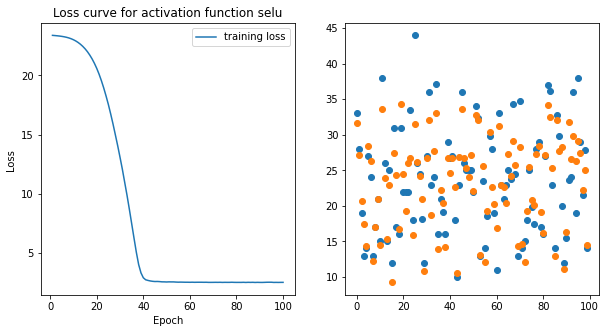

dict_keys(['val_loss', 'val_mse', 'val_r2_coeff', 'val_adj_r2', 'loss', 'mse', 'r2_coeff', 'adj_r2'])


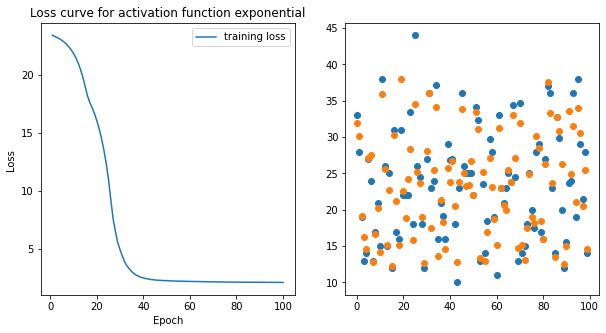

In [9]:
#Defines linear regression model and its structure
r2_list = []
r2_bar_list=[]
for i in activation_list:
    model = model_function(i, len(X))

    #Fits model
    history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    print(history_dict.keys())
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    #plt.figure()
#     plt.plot(loss_values,label='training loss')
#     plt.show()
    # Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
    # with its current weights on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    epochs = range(1, len(loss_values) + 1)

    r2=r2_score(Y_test, y_test_pred)
    r2_list.append(r2)
    r2_bar_list.append(calculate_adj_r2(r2, len(X),len(X_test)))
    plt.subplots(1,2,figsize=(10,5))
    plt.subplot(121)
    plt.title('Loss curve for activation function '+ i)
    plt.xlabel('Epoch')
    plt.ylabel('Loss ')
    plt.plot(epochs, loss_values, '-', label='training loss')
    plt.legend()
    plt.subplot(122)
    plt.scatter(x=range(len(X_test)), y=Y_test)
    plt.scatter(x=range(len(X_test)), y=y_test_pred)
    plt.show()

    # Calculates and prints r2 score of training and testing data
#     print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_train, y_train_pred)))
#     print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_test, y_test_pred)))

In [10]:
print("Neural Net 3 Layers")
for i in range(len(activation_list)):
    print("R2 value for using activation function %s : %s", activation_list[i], r2_list[i])
    print("Ad R2 value for using activation function %s : %s", activation_list[i], r2_bar_list[i])

Neural Net 3 Layers
R2 value for using activation function %s : %s linear 0.8243935672272372
Ad R2 value for using activation function %s : %s linear 0.8110322082119183
R2 value for using activation function %s : %s relu 0.8138769329050879
Ad R2 value for using activation function %s : %s relu 0.7997153951913446
R2 value for using activation function %s : %s sigmoid 0.7622563008099619
Ad R2 value for using activation function %s : %s sigmoid 0.744167106306372
R2 value for using activation function %s : %s tanh 0.7586607055857958
Ad R2 value for using activation function %s : %s tanh 0.740297933184715
R2 value for using activation function %s : %s elu 0.86505189982523
Ad R2 value for using activation function %s : %s elu 0.854784109594541
R2 value for using activation function %s : %s softmax 0.5431631833694583
Ad R2 value for using activation function %s : %s softmax 0.5084038603649605
R2 value for using activation function %s : %s softplus 0.8760449604656653
Ad R2 value for using acti

In [11]:
columns = X
updated_cols=[]
temp_r2=-1000;

for i in range(1,len(columns)+1):
    model_cv = model_function('relu', i)
    model_h = model_cv.fit(X_train[:,0:i], Y_train, batch_size=10,validation_split = 0.2, verbose=0,epochs=100)
    
    predict_y = model_cv.predict(X_test[:,0:i])
    r2_fws=r2_score(Y_test,predict_y)
    if(r2_fws>temp_r2):
        updated_cols.append(columns[i-1])
        temp_r2=r2_fws;


    


In [13]:
print(updated_cols)

['cylinders', 'displacement', 'horsepower', 'weight', 'model year']
